###<font color = blue> 1. compare different branch<br>2.compare different years

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#package needed
#supressing warnings about future changes in Python
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#install modules from inside Jupyter
import sys

import re

import numpy as np

#Natural Language ToolKit
!{sys.executable} -m pip install nltk
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

!{sys.executable} -m pip install sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.lda_model

import matplotlib.pyplot as plt
%matplotlib inline
!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
#import pyLDAvis.sklearn

#html parser for digesting text taken from web-pages
!{sys.executable} -m pip install html.parser
import html.parser
from html.parser import HTMLParser

#handling unicode characters and strings
import unicodedata
import string
!{sys.executable} -m pip install pattern3
import pattern3

from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=a376c4e159532d56b930734928369931810c75dfd99d1e3c13e987b8fbe93972
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
   

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text mining/final/DisneylandReviews.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_ID  Rating Year_Month     Reviewer_Location   
0  670772142       4     Apr-19             Australia  \
1  670682799       4     May-19           Philippines   
2  670623270       4     Apr-19  United Arab Emirates   
3  670607911       4     Apr-19             Australia   
4  670607296       4     Apr-19        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

###<font color = blue> Data preprocessing function

In [5]:
df['Branch'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Branch
Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df_ca = df[df["Branch"] == "Disneyland_California"]
df_pa = df[df["Branch"] == "Disneyland_Paris"]
df_hk = df[df['Branch'] == "Disneyland_HongKong"]
df_hk.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9620, 6)

In [8]:
#def the normalization function
wnl = WordNetLemmatizer()
html_parser = HTMLParser()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#world contraction
contraction_mapping = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#stop words
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
                                 'also','would']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#word tokenization function
nltk.download('punkt')

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
#expand contraction function
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#annotate text tokens with Part-Of-Speach tags
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def pos_tag_text(text_tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None  
    tagged_text = nltk.pos_tag(text_tokens)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag)) for word, pos_tag in tagged_text]
    return tagged_lower_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
#lematization
def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag else word for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#remove special characters
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#stopwords
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#remove non-text hcaracters
def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#remove html
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
    
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#decode
def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8')
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def normalize_corpus(corpus, only_text_chars=True):
    normalized_corpus = []  
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, contraction_mapping)
        text = tokenize_text(text)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        #text = tokenize_text(text)
        normalized_corpus.append(text)    
    return normalized_corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = blue> use normalized_corpus() to normalize review. First we try to use ca data.bold text

In [21]:
ca_corpus = []
hk_corpus = []
pa_corpus = []

for index, row in df.iterrows():
  review = row['Review_Text']
  if row["Branch"] == "Disneyland_HongKong":
    hk_corpus.append(review)
  elif row["Branch"] == "Disneyland_Paris":
    pa_corpus.append(review)
  elif row["Branch"] == "Disneyland_California":
    ca_corpus.append(review)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ca_corpus_norm = normalize_corpus(ca_corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(ca_corpus_norm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19406

In [ ]:
#use bag-of-words to vectorize
bow_vectorizer_ca = CountVectorizer(max_features=1145)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bow_ca = bow_vectorizer_ca.fit_transform(ca_corpus_norm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.DataFrame(data = bow_ca.todense(), columns = bow_vectorizer_ca.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10am  1st  2nd  30pm  3rd  4th  60th  8am  able  absolute  ...  worry  \
0         0    0    0     0    0    0     0    0     0         0  ...      0   
1         0    0    0     0    0    0     0    0     0         0  ...      0   
2         0    0    0     0    0    0     0    0     0         0  ...      0   
3         0    0    0     0    0    0     0    0     1         0  ...      0   
4         0    0    0     0    0    0     0    0     0         0  ...      0   
...     ...  ...  ...   ...  ...  ...   ...  ...   ...       ...  ...    ...   
19401     0    0    0     0    0    0     0    0     0         0  ...      0   
19402     0    0    0     0    0    0     0    0     0         0  ...      0   
19403     0    0    0     0    0    0     0    0     0         0  ...      0   
19404     0    0    0     0    0    0     0    0     0         0  ...      0   
19405     0    0    0     0    0    0     0    0     0         0  ...      0   

       worth  wow  write  wrong  year  yes  yet  young  yr  
0          0    0      0      0     0    0    0      1   0  
1          1    0      0      0     0    0    0      0   0  
2          1    0      0      0     0    0    0      0   0  
3          0    0      0      0     1    0    0      0   0  
4          0    0      0      0     0    0    0      0   0  
...      ...  ...    ...    ...   ...  ...  ...    ...  ..  
19401      0    0      0      0     2    0    0      0   1  
19402      0    0      0      0     0    0    0      0   0  
19403      0    0      0      0     0    0    1      0   0  
19404      0    0      0      0     0    0    0      0   0  
19405      0    0      0      0     1    1    0      1   0  

[19406 rows x 1145 columns]

In [ ]:
#topic
lda_ca_1 = LatentDirichletAllocation(n_components=5, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(bow_ca)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#top 20 words in each topic
display_topics(lda_ca_1, bow_vectorizer_ca.get_feature_names_out(), 25)

Topic 0:
parade show firework character food take night park kid great mickey eat water good bring street day lot photo main halloween stay watch around restaurant
Topic 1:
disneyland time place year love great kid day visit ride park fun always family old happy every enjoy experience disney child earth trip take still
Topic 2:
disney park disneyland world california visit ride small adventure like much attraction time florida magic good love well still land original many experience theme great
Topic 3:
park line day ride people time disney disneyland wait ticket us hour crowd could long take many price even like food pay pas way minute
Topic 4:
ride day time fast park wait line pas mountain long disneyland use early pass space hour great minute california adventure crowd jones star indiana first


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#calculate cohrence score
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

ca_corpus_tokenized = [tokenize_text(ca_corpus_norm[doc_id]) for doc_id in range(len(ca_corpus_norm))]

ca_dictionary = Dictionary(ca_corpus_tokenized)

ca_corpus_bow = [ca_dictionary.doc2bow(doc) for doc in ca_corpus_tokenized]

topic_topwords = get_topic_words(vectorizer = bow_vectorizer_ca, lda_model = lda_ca_1, n_words=25)

 

In [ ]:
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = ca_corpus_bow , 
                    dictionary = ca_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))

In [ ]:
#try 3 topic
lda_ca_2 = LatentDirichletAllocation(n_components=3, max_iter=100,
                                     doc_topic_prior = 0.15,
                                     topic_word_prior = 0.15).fit(bow_ca)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
display_topics(lda_ca_2, bow_vectorizer_ca.get_feature_names_out(), 25)

Topic 0:
disneyland park disney time place love visit great year ride day kid fun world much always experience family like old enjoy still well happy every
Topic 1:
ride mountain park time day show space disneyland parade wait california line adventure firework great pirate star world jones indiana close fast good disney like
Topic 2:
park day ride time line wait disneyland pas disney fast people long take crowd hour food ticket use us good kid want minute visit pass


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_topwords = get_topic_words(vectorizer = bow_vectorizer_ca, lda_model = lda_ca_2, n_words=25)
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = ca_corpus_bow , 
                    dictionary = ca_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score for the model:  -1.3778


###<font color = blue>Try the TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_vectorizer_ca = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tf_ca = tf_vectorizer_ca.fit_transform(ca_corpus_norm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.DataFrame(data = tf_ca.todense(), columns = tf_vectorizer_ca.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10am  1st  2nd  30pm  3rd  4th  60th  8am      able  absolute  ...  \
0       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
1       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
2       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
3       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.098461       0.0  ...   
4       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
...     ...  ...  ...   ...  ...  ...   ...  ...       ...       ...  ...   
19401   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
19402   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
19403   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
19404   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   
19405   0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.000000       0.0  ...   

       worry     worth  wow  write  wrong      year       yes       yet  \
0        0.0  0.000000  0.0    0.0    0.0  0.000000  0.000000  0.000000   
1        0.0  0.117067  0.0    0.0    0.0  0.000000  0.000000  0.000000   
2        0.0  0.138476  0.0    0.0    0.0  0.000000  0.000000  0.000000   
3        0.0  0.000000  0.0    0.0    0.0  0.068505  0.000000  0.000000   
4        0.0  0.000000  0.0    0.0    0.0  0.000000  0.000000  0.000000   
...      ...       ...  ...    ...    ...       ...       ...       ...   
19401    0.0  0.000000  0.0    0.0    0.0  0.118062  0.000000  0.000000   
19402    0.0  0.000000  0.0    0.0    0.0  0.000000  0.000000  0.000000   
19403    0.0  0.000000  0.0    0.0    0.0  0.000000  0.000000  0.126488   
19404    0.0  0.000000  0.0    0.0    0.0  0.000000  0.000000  0.000000   
19405    0.0  0.000000  0.0    0.0    0.0  0.022037  0.038041  0.000000   

          young        yr  
0      0.230773  0.000000  
1      0.000000  0.000000  
2      0.000000  0.000000  
3      0.000000  0.000000  
4      0.000000  0.000000  
...         ...       ...  
19401  0.000000  0.136438  
19402  0.000000  0.000000  
19403  0.000000  0.000000  
19404  0.000000  0.000000  
19405  0.034174  0.000000  

[19406 rows x 1145 columns]

In [ ]:
#topic
lda_ca_tf = LatentDirichletAllocation(n_components=5, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_ca)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
display_topics(lda_ca_tf, tf_vectorizer_ca.get_feature_names_out(), 25)

Topic 0:
ride park day time line wait disneyland fast pas disney take people food long hour good use crowd kid visit great ticket lot place us
Topic 1:
disney park world disneyland florida visit small ride time orlando much original disneyworld california like love great good magic still wdw compare attraction kingdom walt
Topic 2:
time crowd great christmas day ride disneyland halloween line park love busy firework parade wait long visit holiday year fun night week decoration always season
Topic 3:
mountain pirate star space jones indiana ride splash caribbean tour matterhorn mansion war thunder haunted favorite haunt new close coaster big nemo land railroad jungle
Topic 4:
place disneyland love kid great time fun happy year family always earth park ride day every old visit disney age magical child experience clean everyone


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = blue>We can find that by using TF_IDF, though the coherent score is similar, the topic is a bit more intrepeable. <br>We can summarize each topic:<br>Topic 0: This topic is related to visiting Disneyland, including topics such as rides, wait times, crowds, and food. It also mentions the FastPass system and tips for navigating the park.<br> Topic 1: This topic is about comparisons between different Disney parks, such as Disney World, Disneyland, and Disneyworld. It also mentions the original Disneyland and the magic of Disney.<br>Topic 2: This topic is related to seasonal events at Disneyland, including Christmas and Halloween. It mentions the decorations, parades, and firework shows that occur during these holidays.<br>Topic 3: This topic is focused on specific rides at Disneyland, including Space Mountain, Pirates of the Caribbean, and Haunted Mansion. It also mentions newer rides like Nemo and the various lands within the park.<br>Topic 4: This topic is about people's experiences and emotions related to visiting Disneyland, including their love for the park, the fun they have with family and children, and the magical atmosphere of the park.

In [ ]:
#coherence score of TFIDF

topic_topwords = get_topic_words(vectorizer = tf_vectorizer_ca, lda_model = lda_ca_tf, n_words=25)

cm = CoherenceModel(topics=topic_topwords, 
                    corpus = ca_corpus_bow , 
                    dictionary = ca_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4)) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score for the model:  -1.4522


###<font color = blue> Then try to use sentiment analysis in the reviews

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
compound_scores = []
for review in ca_corpus_norm:
    compound_scores.append(analyzer.polarity_scores(review)['compound'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#check the average score of reviews
average_score_ca = sum(compound_scores) / len(compound_scores)
average_score_ca

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7443348448933261

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


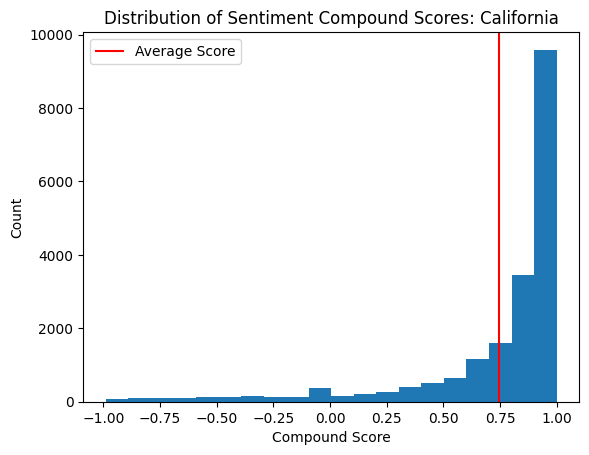

In [ ]:
#show the distribution
plt.hist(compound_scores, bins=20)
plt.axvline(x=average_score_ca, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores: California")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
#check the score of each topic
topic_words = lda_ca_tf.components_
feature_names = tf_vectorizer_ca.get_feature_names_out()

# Iterate through each topic and analyze the sentiment of the top words
for topic_idx, topic in enumerate(topic_words):
    #print("Topic %d:" % (topic_idx))
    word_scores = []
    for i in topic.argsort()[:-100:-1]:
        word = feature_names[i]
        score = analyzer.polarity_scores(word)['compound']
        word_scores.append(score)
        #print(word, score)
    # Calculate the average sentiment score for the topic
    topic_score = sum(word_scores) / len(word_scores)
    print("Average score for Topic %d: %.3f\n" % (topic_idx, topic_score))

Average score for Topic 0: 0.061

Average score for Topic 1: 0.070

Average score for Topic 2: 0.079

Average score for Topic 3: 0.029

Average score for Topic 4: 0.120



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = blue> Now, we try to comapre different years of CA

In [22]:
df_ca['Year_Month'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Year_Month
missing    1204
Jul-15      351
Jun-15      343
Aug-15      343
May-15      325
           ... 
Jul-10        4
Sep-10        3
May-10        2
May-19        1
Apr-10        1
Name: count, Length: 111, dtype: int64

In [23]:
df_ca_year = df_ca[df_ca["Year_Month"] != "missing"]
df_ca_year["Year"] = df_ca["Year_Month"].str[-2:]
df_ca_year["Year"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-27937fc72e45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca_year["Year"] = df_ca["Year_Month"].str[-2:]


Year
15    3239
16    2800
14    2643
13    2328
12    2310
17    2064
18    1501
11     953
19     292
10      72
Name: count, dtype: int64

In [24]:
data_ca_early = df_ca_year[df_ca_year["Year"].astype(int) < 15]
data_ca_late = df_ca_year[df_ca_year["Year"].astype(int) >= 15]

print(data_ca_early.shape)
print(data_ca_late.shape)

(8306, 7)
(9896, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
ca_corpus_early = []
ca_corpus_late = []

for index, row in data_ca_early.iterrows():
  review = row['Review_Text']
  ca_corpus_early.append(review)

for index, row in data_ca_late.iterrows():
  review = row['Review_Text']
  ca_corpus_late.append(review)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = blue> normalize two time corpus

In [26]:
ca_corpus_early_norm = normalize_corpus(ca_corpus_early)
ca_corpus_late_norm = normalize_corpus(ca_corpus_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer_ca_early = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)
tf_vectorizer_ca_late = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
tf_ca_early = tf_vectorizer_ca_early.fit_transform(ca_corpus_early_norm)
tf_ca_late = tf_vectorizer_ca_late.fit_transform(ca_corpus_late_norm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = blue> Then we can get the topics of two time. We choose to get four topic. 

In [29]:
lda_ca_tf_early = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_ca_early)

lda_ca_tf_late = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_ca_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#early
display_topics(lda_ca_tf_early, tf_vectorizer_ca_early.get_feature_names_out(), 40)

Topic 0:
disneyland place disney love park time visit kid year world earth great happy family fun day ride like always magical child old much enjoy every experience still never age really california first everything best well trip wonderful take florida magic
Topic 1:
christmas halloween time crowd great ride love line disneyland busy fun long wait day holiday party week park always decoration year weather visit mountain season mansion close weekend summer hot pirate space still avoid october crowded beautiful trip even lot
Topic 2:
ride park day time disneyland line disney wait fast pas great take good visit kid long food people california like year crowd hour place show really love lot much want early use adventure first many fun mountain us enjoy ticket
Topic 3:
clean food great friendly staff park helpful fun good ride cast member birthday always line service disneyland love everything price well dislike time expensive everyone lot place long fast family disney attraction day pas l

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


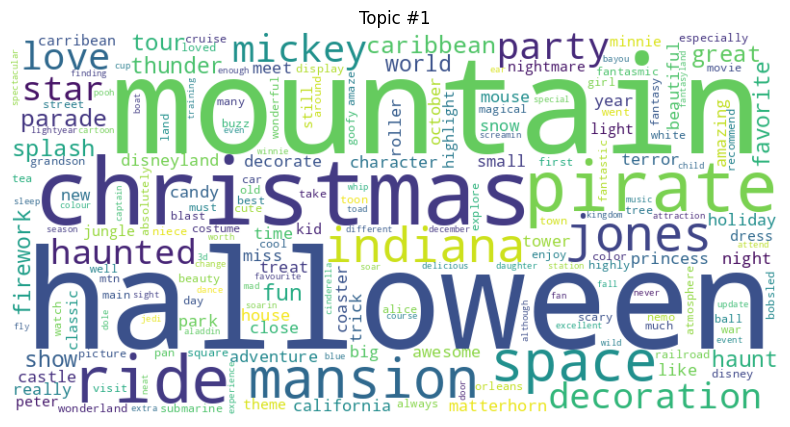

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


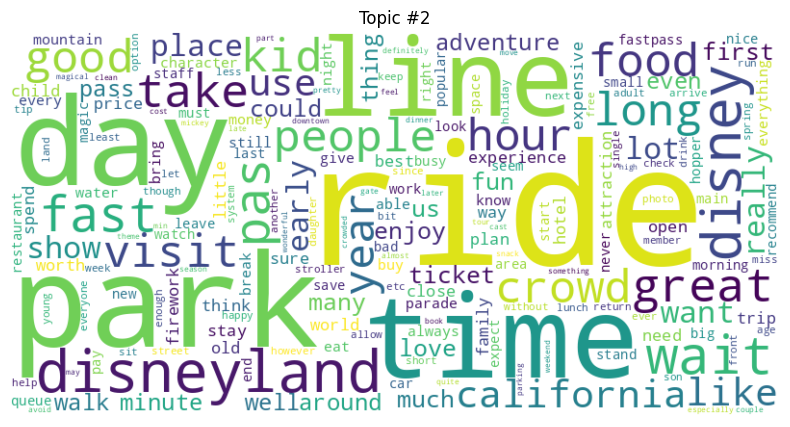

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


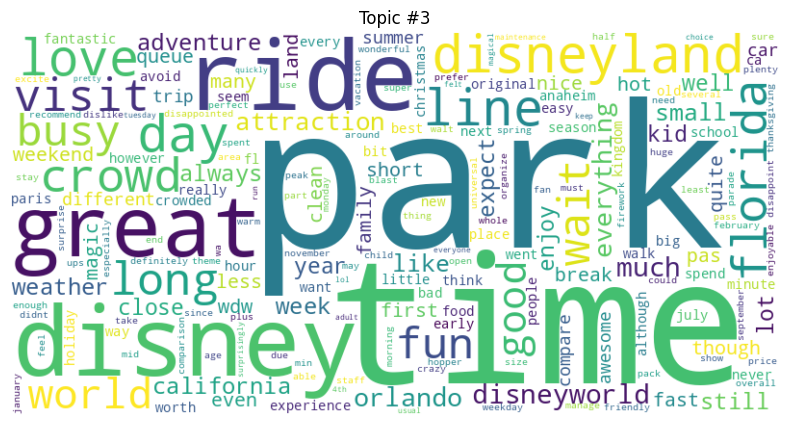

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


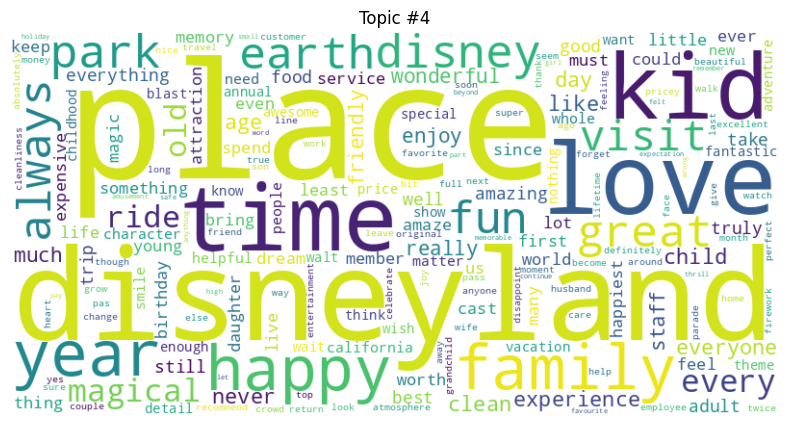

In [ ]:
#draw a world for each topic of early

topic_word = lda_ca_tf_early.components_

feature_names = tf_vectorizer_ca_early.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

In [34]:
#late
display_topics(lda_ca_tf_late, tf_vectorizer_ca_late.get_feature_names_out(), 40)

Topic 0:
great love time disneyland place always fun parade friendly park year staff day clean ride family firework happy amazing visit anniversary halloween birthday 60th magical disney every kid show wonderful earth night christmas food experience enjoy everyone helpful best crowd
Topic 1:
ride day park time fast pas wait line disneyland mountain great disney use early take long pass visit parade good kid love food show crowd lot fun hour want enjoy plan really place minute like app first adventure much firework
Topic 2:
park ride line time day people disney disneyland crowd wait long visit many hour year place price like even good could kid pas ticket us food take really experience way staff lot think fast great pay well money family minute
Topic 3:
disney disneyland park world visit love place time ride small much great kid year original fun florida still enjoy magic experience old first day like family child california always orlando trip walt good many wdw kingdom every magical f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


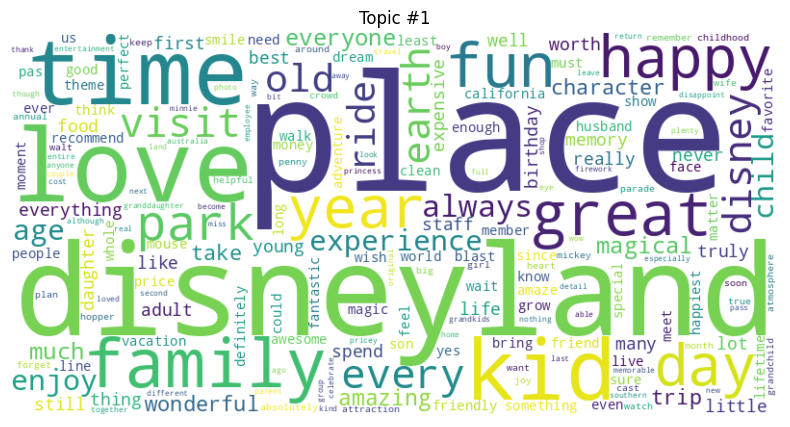

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


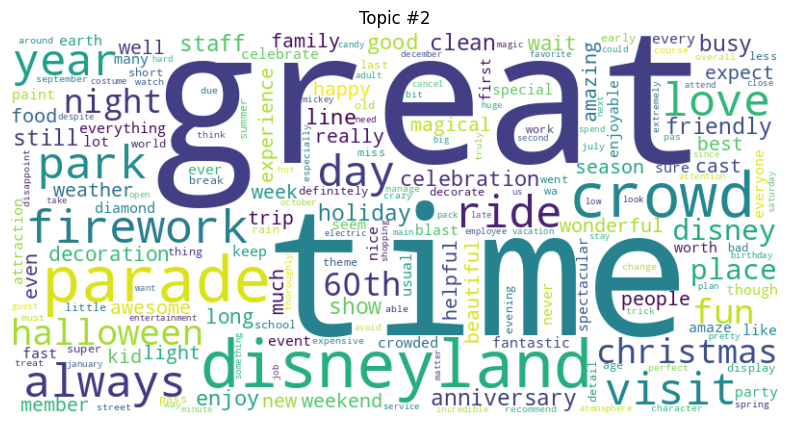

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


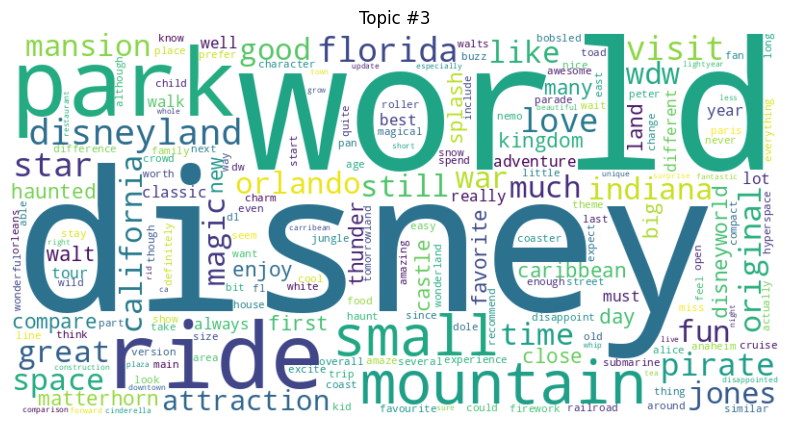

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


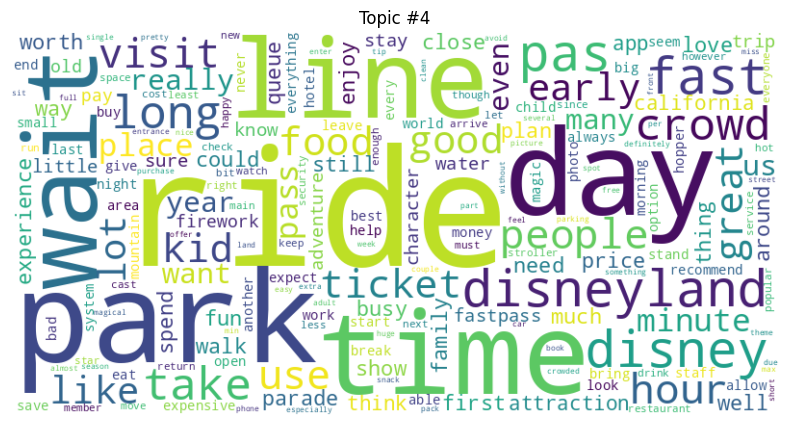

In [33]:
#word cloud of late data

topic_word = lda_ca_tf_late.components_

feature_names = tf_vectorizer_ca_late.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

###<font color = blue>So we can find some different between reviews before and after 2015.<br>Based on the top words in each topic, it appears that the topics for reviews before 2015 are:<br>Topic 0: Disneyland mountain rides, including Pirates of the Caribbean, Space Mountain, and the Matterhorn, as well as holiday-themed attractions.<br>Topic 1: Crowds and wait times at Disneyland, especially during busy times like holidays and weekends.<br>Topic 2: Overall enjoyment of Disneyland as a place to visit with family, including rides and attractions for children.<br>Topic 3: The experience of visiting Disneyland, including waiting in lines, food options, and crowd control.<br>The topics for reviews after 2015 appear to be:<br>Topic 0: Overall enjoyment of Disneyland as a place to visit with family, including rides and attractions for children.<br>Topic 1: Special events and entertainment at Disneyland, such as parades, fireworks, and seasonal celebrations.<br>Topic 2: Comparisons between Disneyland and other Disney parks, particularly Disney World in Florida.<br>Topic 3: The experience of visiting Disneyland, including waiting in lines, food options, and crowd control.<br>For reviews before 2015, the top words in each topic suggest that visitors were primarily interested in Disneyland's attractions, including mountain rides like Space Mountain and Pirates of the Caribbean, holiday-themed attractions, and the overall experience of visiting Disneyland. There is also a focus on crowds and wait times, as well as the experience of visiting the park with family.<br>For reviews after 2015, the top words in each topic suggest that visitors are still interested in Disneyland's attractions and the experience of visiting the park, but there is a greater emphasis on special events and entertainment, including parades, fireworks, and seasonal celebrations. There is also a focus on comparisons between Disneyland and other Disney parks, particularly Disney World in Florida, as well as on cleanliness, friendly staff, and overall park experience.

###<font color = blue> try to do setiment analysis on two different reviews set

In [35]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [36]:
compound_scores_ca_early = []
for review in ca_corpus_early_norm:
    compound_scores_ca_early.append(analyzer.polarity_scores(review)['compound'])

compound_scores_ca_late = []
for review in ca_corpus_late_norm:
    compound_scores_ca_late.append(analyzer.polarity_scores(review)['compound'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#average score of early and late

#early
average_score_ca_early = sum(compound_scores_ca_early) / len(compound_scores_ca_early)
print("Average score for early review : %.3f\n" % (average_score_ca_early))

#late
average_score_ca_late = sum(compound_scores_ca_late) / len(compound_scores_ca_late)
print("Average score for late review : %.3f\n" % (average_score_ca_late))

Average score for early review : 0.751

Average score for late review : 0.737



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


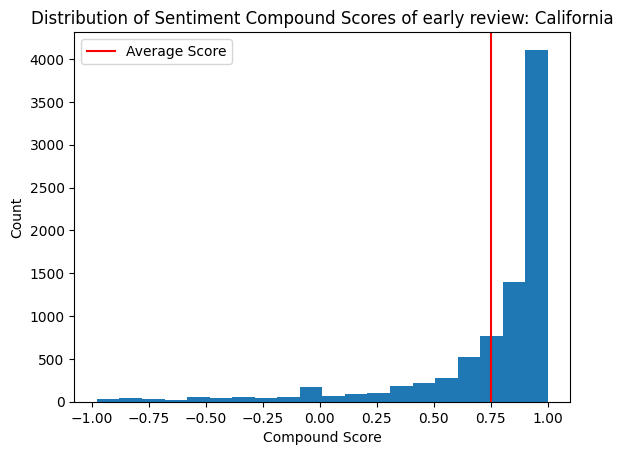

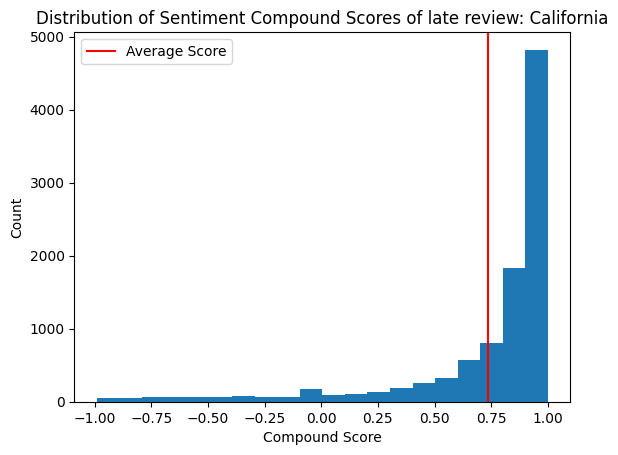

In [38]:
#make a distribution plot

#early
plt.hist(compound_scores_ca_early, bins=20)
plt.axvline(x=average_score_ca_early, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of early review: California")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

#late
plt.hist(compound_scores_ca_late, bins=20)
plt.axvline(x=average_score_ca_late, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of late review: California")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


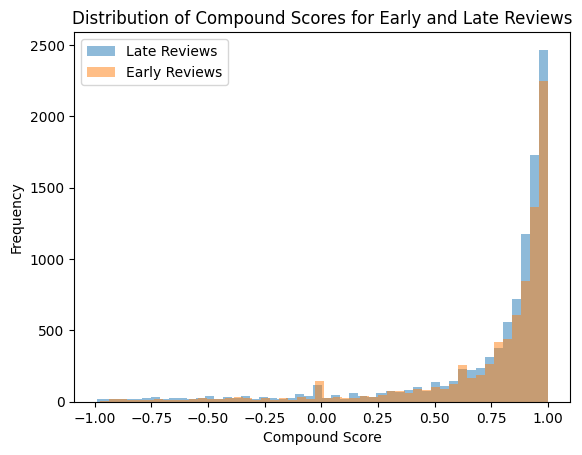

In [42]:
#put them together to compare

plt.hist(compound_scores_ca_late, bins=50, alpha=0.5, label='Late Reviews')

# Create a histogram plot for the compound scores of late reviews
plt.hist(compound_scores_ca_early, bins=50, alpha=0.5, label='Early Reviews')

# Add labels and legend
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores for Early and Late Reviews')
plt.legend()

# Show the plot
plt.show()

###<font color = green>Now we use Paris disneyland reviews to do analysis.

In [46]:
df_pa.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_ID  Rating Year_Month     Reviewer_Location   
29026  670721950       5     Mar-19  United Arab Emirates  \
29027  670686565       4     Jun-18        United Kingdom   
29028  670606796       5     Apr-19        United Kingdom   
29029  670586937       4     Apr-19             Australia   
29030  670535589       5    missing                France   

                                             Review_Text            Branch  
29026  We've been to Disneyland Hongkong and Tokyo, s...  Disneyland_Paris  
29027  I went to Disneyland Paris in April 2018 on Ea...  Disneyland_Paris  
29028  What a fantastic place, the queues were decent...  Disneyland_Paris  
29029  We didn't realise it was school holidays when ...  Disneyland_Paris  
29030  A Trip to Disney makes you all warm and fuzzy ...  Disneyland_Paris

In [43]:
df_pa.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(13630, 6)

In [48]:
df_pa_year = df_pa[df_pa["Year_Month"] != "missing"]
df_pa_year["Year"] = df_pa["Year_Month"].str[-2:]
df_pa_year["Year"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-c7b379959439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_year["Year"] = df_pa["Year_Month"].str[-2:]


Year
15    2164
16    1954
17    1736
14    1634
13    1506
18    1479
12    1316
11     609
19     256
10      40
Name: count, dtype: int64

In [52]:
data_pa_early = df_pa_year[df_pa_year["Year"].astype(int) < 15]
data_pa_late = df_pa_year[df_pa_year["Year"].astype(int) >= 16]

print(data_pa_early.shape)
print(data_pa_late.shape)

(5105, 7)
(5425, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
pa_corpus_early = []
pa_corpus_late = []

for index, row in data_pa_early.iterrows():
  review = row['Review_Text']
  pa_corpus_early.append(review)

for index, row in data_pa_late.iterrows():
  review = row['Review_Text']
  pa_corpus_late.append(review)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = green> Also normalize them

In [55]:
pa_corpus_early_norm = normalize_corpus(pa_corpus_early)

pa_corpus_late_norm = normalize_corpus(pa_corpus_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer_pa_early = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)
tf_vectorizer_pa_late = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
tf_pa_early = tf_vectorizer_pa_early.fit_transform(pa_corpus_early_norm)
tf_pa_late = tf_vectorizer_pa_late.fit_transform(pa_corpus_late_norm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = green> We also try to use 4 topics

In [58]:
lda_pa_tf_early = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_pa_early)

lda_pa_tf_late = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_pa_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
display_topics(lda_pa_tf_early, tf_vectorizer_pa_early.get_feature_names_out(), 40)

Topic 0:
love great ride place kid show time amazing park day disney magical disneyland parade visit fun child enjoy age like dream firework fantastic really attraction year experience family amaze everything christmas character must every old night lot best adult castle
Topic 1:
park disney paris disneyland ride staff florida visit good like french attraction california time orlando line experience food much smoke magic close people well many world place compare rude fun service small great really american seem day expect dirty need
Topic 2:
park ride day time disney queue food good take hotel wait visit disneyland child great kid hour year character show fast long really parade ticket stay lot expensive paris place people much minute well around even us like could pas
Topic 3:
wa entertainment alot word ideal absolute crowded row pm february weekend appreciate pack fit lol obviously sad winter review side general advice sunday terror particularly tower describe except transport accep

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


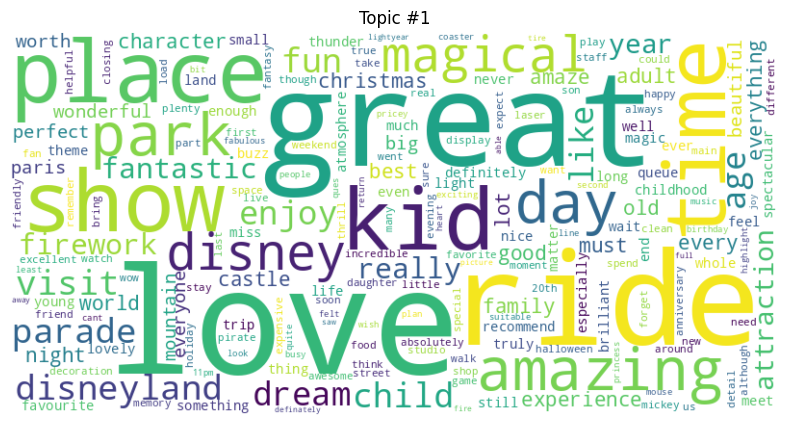

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


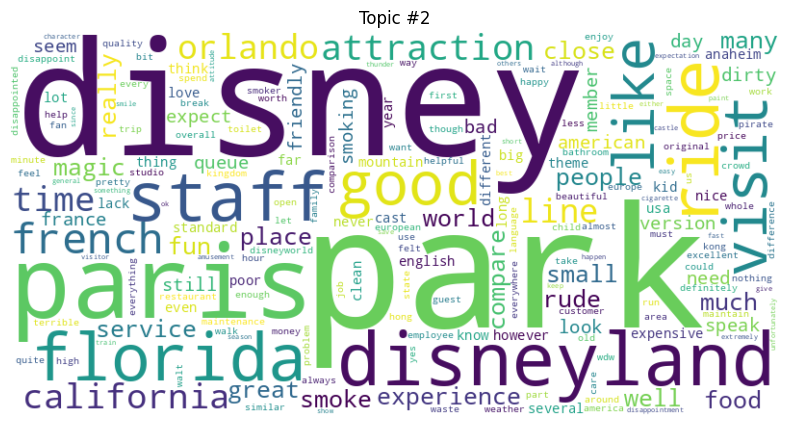

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


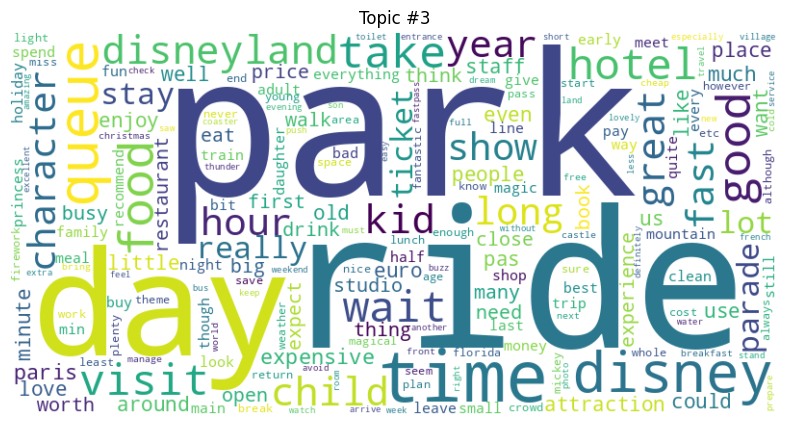

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


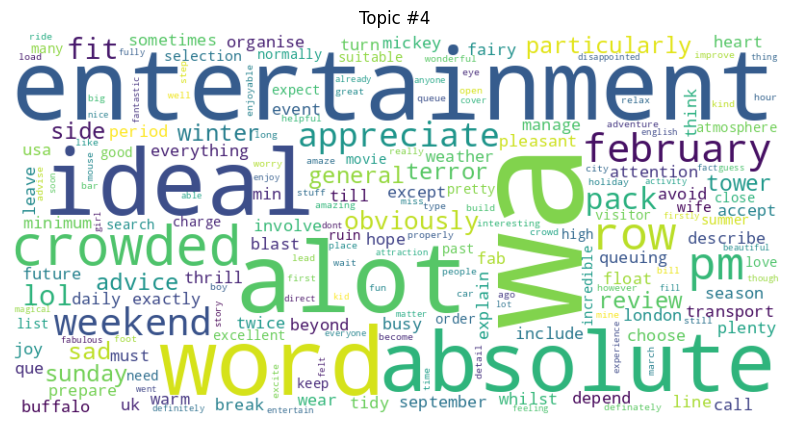

In [60]:
topic_word = lda_pa_tf_early.components_

feature_names = tf_vectorizer_pa_early.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

In [62]:
display_topics(lda_pa_tf_late, tf_vectorizer_pa_late.get_feature_names_out(), 40)

Topic 0:
mountain coaster pirate jones indiana roller space thunder caribbean star manor buzz peter pan phantom tour lightyear rock hyperspace rollercoaster tower war terror blast crush laser aerosmith land favorite ratatouille darth vader adventure flight robinson big house fantasy tree haunted
Topic 1:
park ride disney time day queue good food wait visit disneyland close take hour great paris long really ticket lot fast people attraction show year kid place staff character line much many like hotel minute child well around pas even
Topic 2:
love place time park day great visit magical ride parade amazing show disney kid child age year firework disneyland enjoy experience amaze fantastic family fun every lot everything recommend old staff character dream everyone good really adult much worth well
Topic 3:
disneyland paris california anaheim park tokyo disney kong hong orlando favorite small kingdom similar disneyworld visit compare florida walt version world dragon nice europe fun bea

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


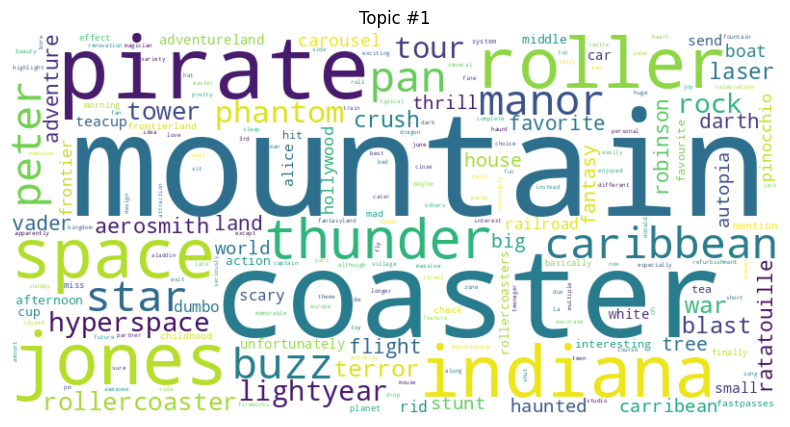

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


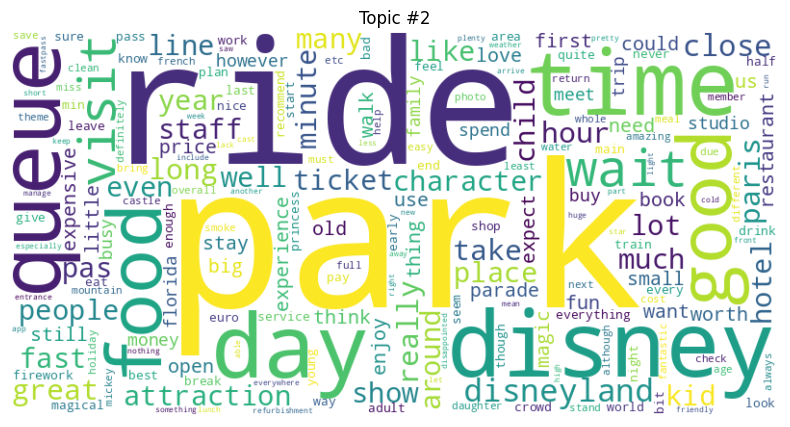

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


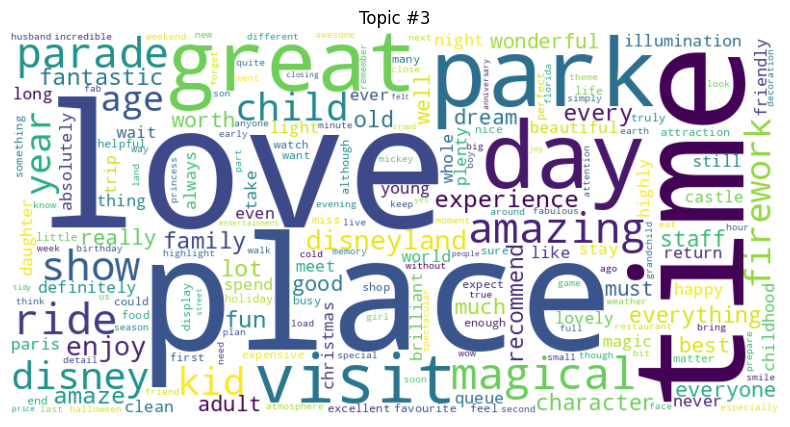

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


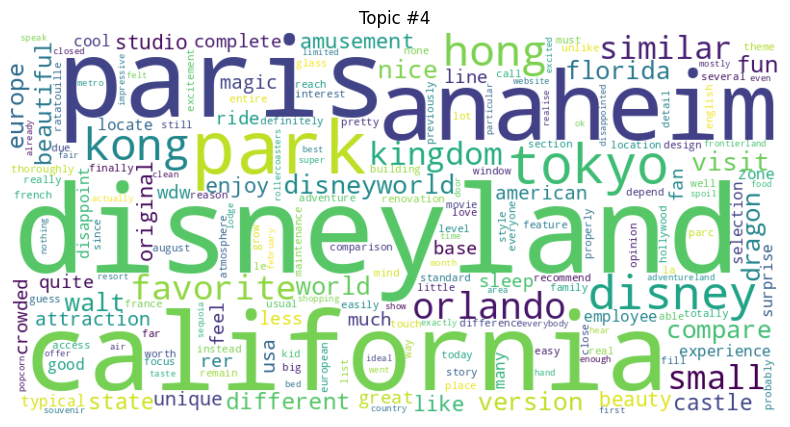

In [63]:
topic_word = lda_pa_tf_late.components_

feature_names = tf_vectorizer_pa_late.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

###<font color = green>For Disneyland Paris, the top words in each topic for reviews before 2015 suggest the following:<br>Topic 0: Positive reviews of Disneyland Paris, including the rides and attractions, the parade, and the overall magical experience of visiting the park.<br>Topic 1: Comparisons between Disneyland Paris and other Disney parks, particularly those in Florida and California, as well as criticisms of the French culture and behavior of some visitors.<br>Topic 2: Practical aspects of visiting Disneyland Paris, including wait times, food options, and staying in a hotel near the park.<br>Topic 3: Unclear or off-topic reviews that do not seem to provide useful information about the park.<br>The top words in each topic for reviews after 2016 suggest the following:<br>Topic 0: Rides and attractions at Disneyland Paris, including roller coasters and themed experiences based on popular movies and franchises.<br>Topic 1: Practical aspects of visiting Disneyland Paris, including wait times, food options, and staying in a hotel near the park.<br>Topic 2: Positive reviews of Disneyland Paris, including the rides and attractions, the parade, and the overall magical experience of visiting the park.<br>Topic 3: Comparisons between Disneyland Paris and other Disney parks, particularly those in California, Tokyo, and Hong Kong.<br>Based on the top words, it seems that there are some similarities in the topics discussed in both time periods, such as the practical aspects of visiting the park and comparisons to other Disney parks. However, the topics for reviews after 2016 seem to focus more on specific rides and attractions, while the topics for reviews before 2015 are more general and focus on the overall experience of visiting Disneyland Paris. Additionally, there are criticisms of French culture and behavior in the earlier reviews, while the later reviews focus more on positive experiences and comparisons to other Disney parks.

###<font color = green>Also do sentiment analysis

In [64]:
compound_scores_pa_early = []
for review in pa_corpus_early_norm:
    compound_scores_pa_early.append(analyzer.polarity_scores(review)['compound'])

compound_scores_pa_late = []
for review in pa_corpus_late_norm:
    compound_scores_pa_late.append(analyzer.polarity_scores(review)['compound'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
#average score of early and late

#early
average_score_pa_early = sum(compound_scores_pa_early) / len(compound_scores_pa_early)
print("Average score for early review : %.3f\n" % (average_score_ca_early))

#late
average_score_pa_late = sum(compound_scores_pa_late) / len(compound_scores_pa_late)
print("Average score for late review : %.3f\n" % (average_score_ca_late))

Average score for early review : 0.751

Average score for late review : 0.737



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


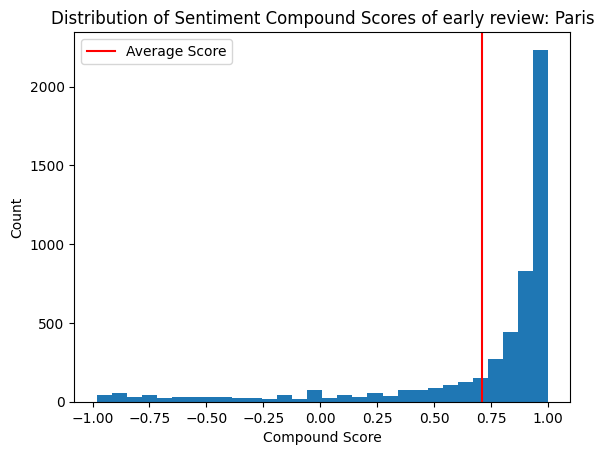

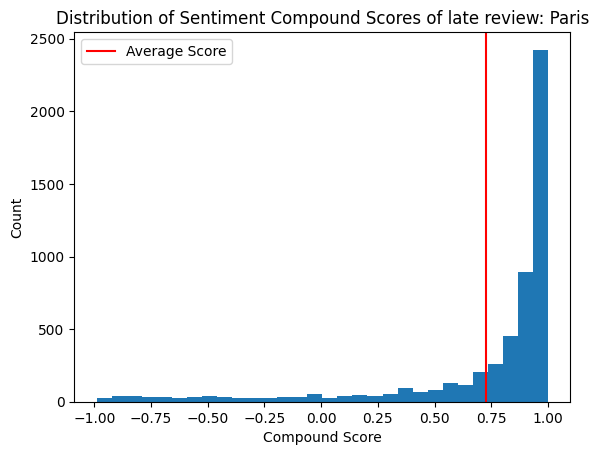

In [69]:
#make a distribution plot

#early
plt.hist(compound_scores_pa_early, bins=30)
plt.axvline(x=average_score_pa_early, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of early review: Paris")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

#late
plt.hist(compound_scores_pa_late, bins=30)
plt.axvline(x=average_score_pa_late, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of late review: Paris")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


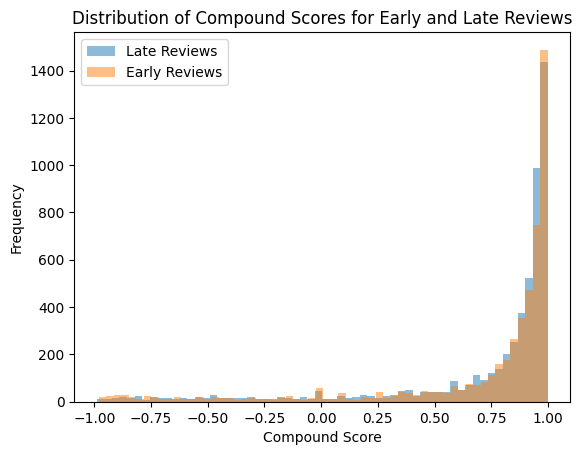

In [70]:
#put them together to compare

plt.hist(compound_scores_pa_late, bins=60, alpha=0.5, label='Late Reviews')

# Create a histogram plot for the compound scores of late reviews
plt.hist(compound_scores_pa_early, bins=60, alpha=0.5, label='Early Reviews')

# Add labels and legend
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores for Early and Late Reviews')
plt.legend()

# Show the plot
plt.show()

###<font color = green> We can find that there are more positive words (larger than 0.9) in early reviews, but in case of lower than 0.9, late reviews have more words.

###<font color = red>Now we use Hongkong review data

In [74]:
df_hk.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9620, 6)

In [73]:
df_hk_year = df_hk[df_hk["Year_Month"] != "missing"]
df_hk_year["Year"] = df_hk["Year_Month"].str[-2:]
df_hk_year["Year"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-6635d6595aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hk_year["Year"] = df_hk["Year_Month"].str[-2:]


Year
16    1845
15    1576
17    1395
14    1024
18    1017
13     883
12     716
11     422
19     238
10      31
Name: count, dtype: int64

In [81]:
data_hk_early = df_hk_year[df_hk_year["Year"].astype(int) <= 15]
data_hk_late = df_hk_year[df_hk_year["Year"].astype(int) > 15]

print(data_hk_early.shape)
print(data_hk_late.shape)

(4652, 7)
(4495, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
hk_corpus_early = []
hk_corpus_late = []

for index, row in data_hk_early.iterrows():
  review = row['Review_Text']
  hk_corpus_early.append(review)

for index, row in data_hk_late.iterrows():
  review = row['Review_Text']
  hk_corpus_late.append(review)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = red>We also use normalization function

In [83]:
hk_corpus_early_norm = normalize_corpus(hk_corpus_early)

hk_corpus_late_norm = normalize_corpus(hk_corpus_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer_hk_early = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)
tf_vectorizer_hk_late = TfidfVectorizer(norm = 'l2', smooth_idf = True, max_features=1145)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
tf_hk_early = tf_vectorizer_hk_early.fit_transform(hk_corpus_early_norm)
tf_hk_late = tf_vectorizer_hk_late.fit_transform(hk_corpus_late_norm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###<font color = red>LDA function with 4 topics

In [86]:
lda_hk_tf_early = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_hk_early)

lda_hk_tf_late = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.2,
                                     topic_word_prior = 0.2).fit(tf_hk_late)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
display_topics(lda_hk_tf_early, tf_vectorizer_hk_early.get_feature_names_out(), 40)

Topic 0:
small disneyland park disney compare good kid paris visit much hong kong like ocean florida ride universal still tokyo orlando world studio child great time day place fun hk food worth expensive nothing well nice attraction experience enjoy family bit
Topic 1:
park ride day disney disneyland time small visit queue kid good food take hong line kong great wait show long attraction hk train well place much like child fun parade around really crowd ticket enjoy love people year lot still
Topic 2:
grizzly mountain mystic space coaster toy gulch manor story roller cruise mine land jungle river new car rc house fantasy racer runaway adventure buzz tarzan pooh parachute festival winnie philharmagic mansion adventureland tomorrowland lion point king haunt thrill dog astro
Topic 3:
place disneyland show kid day enjoy visit ride firework disney parade great time fun must love experience character like family night really mickey miss lot child magical park kong hong attraction best good e

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


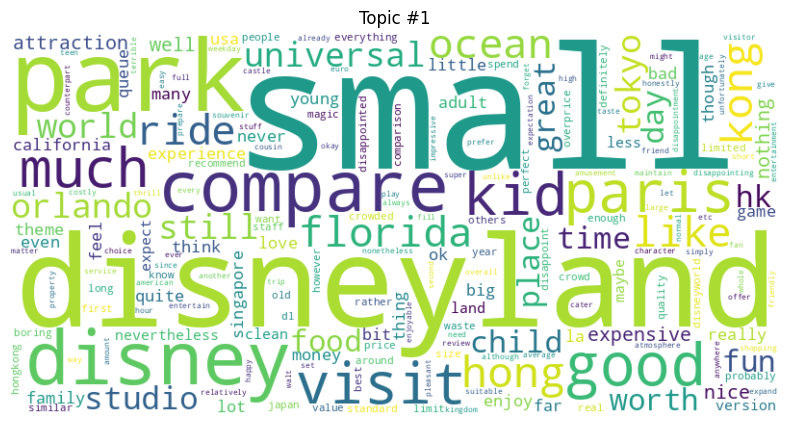

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


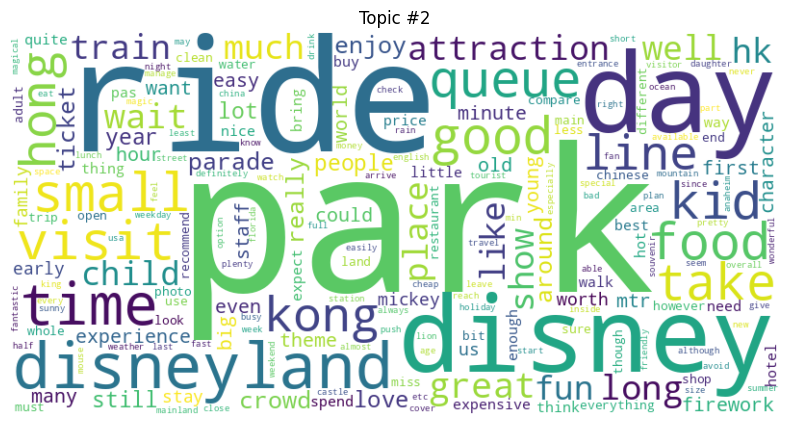

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


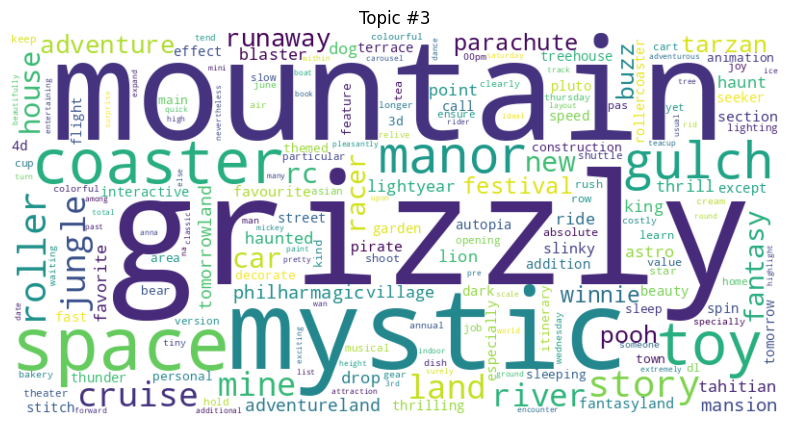

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


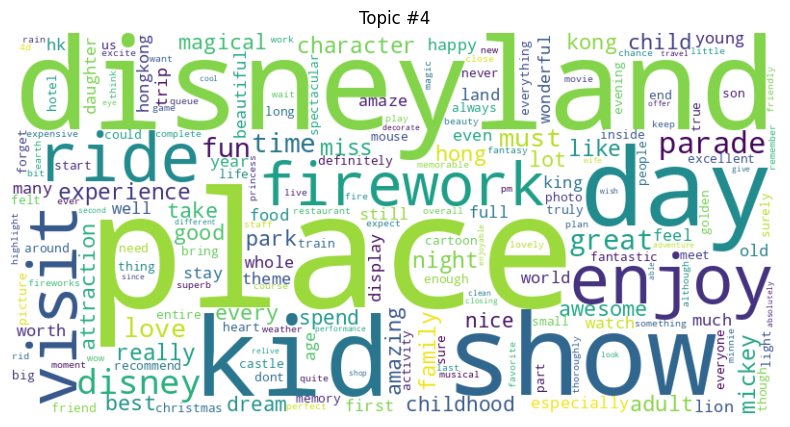

In [88]:
topic_word = lda_hk_tf_early.components_

feature_names = tf_vectorizer_hk_early.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

In [89]:
display_topics(lda_hk_tf_late, tf_vectorizer_hk_late.get_feature_names_out(), 40)

Topic 0:
tourist mainland china cartoon crew cut shove push sticker rude become hence june among luckily sun cause umbrella march cancel control problem april heavy summer roam rain spot follow advice mad unfortunately fry suggest behind rainy crowd collect hat management
Topic 1:
park disney disneyland small ride day visit good great hong kid kong time food much fun attraction well still place compare queue experience hk big really worth child like expect nice year staff line world old theme love long many
Topic 2:
place enjoy kid visit disneyland parade firework show must day fun happy love child family night experience great childhood best time really earth kong dream hong age hongkong ride adult magical disney miss character good awesome lot every friend amaze
Topic 3:
ride day park disneyland disney time show visit take food parade good queue kid ticket great wait line long place attraction small like enjoy mickey really lot experience train around fun hong kong hk character firew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


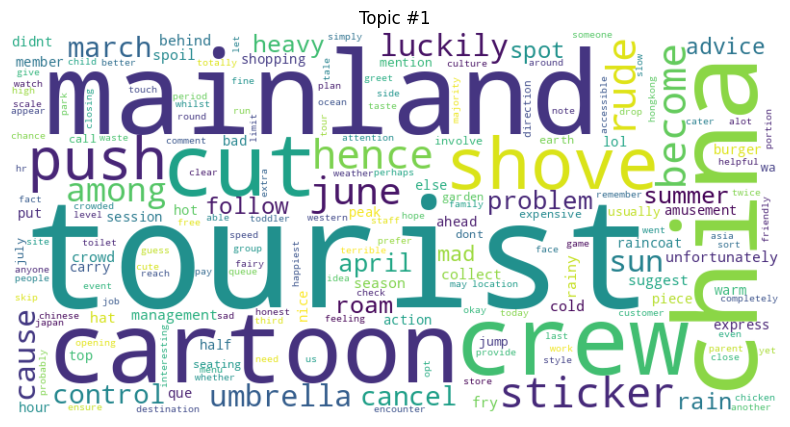

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


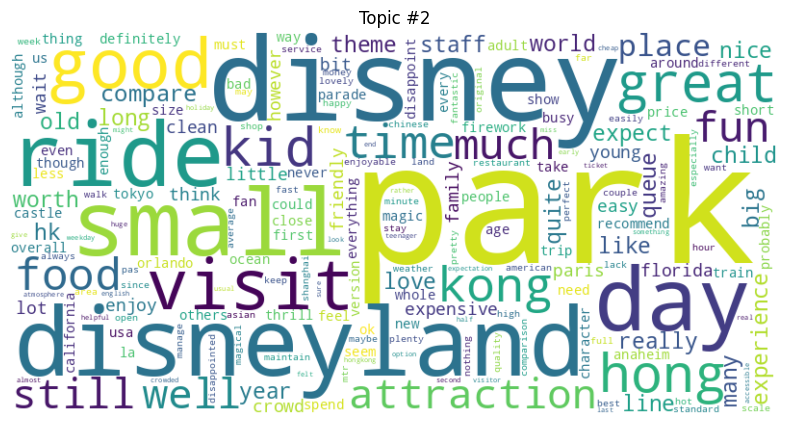

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


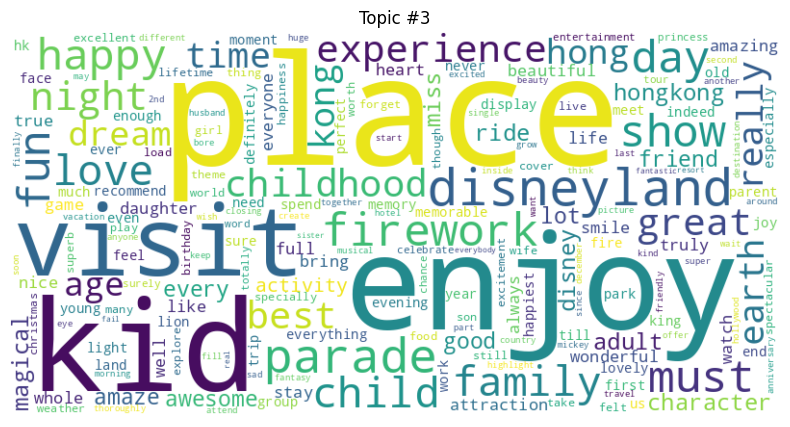

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


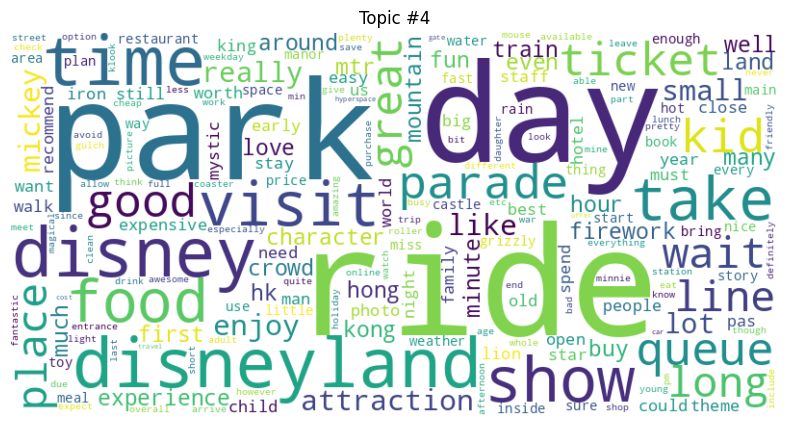

In [90]:
topic_word = lda_hk_tf_late.components_

feature_names = tf_vectorizer_hk_late.get_feature_names_out()

# Create a dictionary to map feature indices to feature names
feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]

# Create a word cloud for each topic
for i, topic_weights in enumerate(topic_word):
    word_freq = {feature_dict[j]: topic_weights[j]
                 for j in range(len(feature_dict))
                 if topic_weights[j] > 0.2} # adjust threshold as needed
    wc = WordCloud(width=800, height=400, background_color="white",
                   max_words=200, relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()

###<font color = red>For Hong Kong Disneyland, the top words in each topic for reviews before 2015 suggest the following:<br>Topic 0: Comparisons between Hong Kong Disneyland and other Disney parks, particularly those in Paris and Florida, as well as criticisms of the size of the park and the price of admission.<br>Topic 1: Practical aspects of visiting Hong Kong Disneyland, including wait times, food options, and staying in a hotel near the park.<br>Topic 2: Specific rides and attractions at Hong Kong Disneyland, including roller coasters, themed areas, and shows.<br>Topic 3: Positive reviews of Hong Kong Disneyland, including the rides and attractions, the parade, and the overall magical experience of visiting the park.<br>The top words in each topic for reviews after 2016 suggest the following:<br><br>Topic 0: Criticisms of the behavior of tourists from mainland China, as well as complaints about the weather and other practical aspects of visiting the park.<br>Topic 1: Practical aspects of visiting Hong Kong Disneyland, including wait times, food options, and comparisons to other Disney parks.<br>Topic 2: Positive reviews of Hong Kong Disneyland, including the rides and attractions, the parade, and the overall magical experience of visiting the park.<br>Topic 3: Specific rides and attractions at Hong Kong Disneyland, including shows, parades, and themed areas.<br><br>Based on the top words, it seems that there are some similarities in the topics discussed in both time periods, such as practical aspects of visiting the park and specific rides and attractions. However, the topics for reviews after 2016 seem to focus more on criticisms of the behavior of mainland Chinese tourists, while the topics for reviews before 2015 are more general and focus on comparisons to other Disney parks and the size and price of Hong Kong Disneyland. Additionally, there are positive reviews in both time periods, with a focus on the magical experience of visiting the park

###<font color = red>check the sentiment

In [91]:
compound_scores_hk_early = []
for review in hk_corpus_early_norm:
    compound_scores_hk_early.append(analyzer.polarity_scores(review)['compound'])

compound_scores_hk_late = []
for review in hk_corpus_late_norm:
    compound_scores_hk_late.append(analyzer.polarity_scores(review)['compound'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
#average score of early and late

#early
average_score_hk_early = sum(compound_scores_hk_early) / len(compound_scores_hk_early)
print("Average score for early review : %.3f\n" % (average_score_hk_early))

#late
average_score_hk_late = sum(compound_scores_hk_late) / len(compound_scores_hk_late)
print("Average score for late review : %.3f\n" % (average_score_hk_late))

Average score for early review : 0.756

Average score for late review : 0.753



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


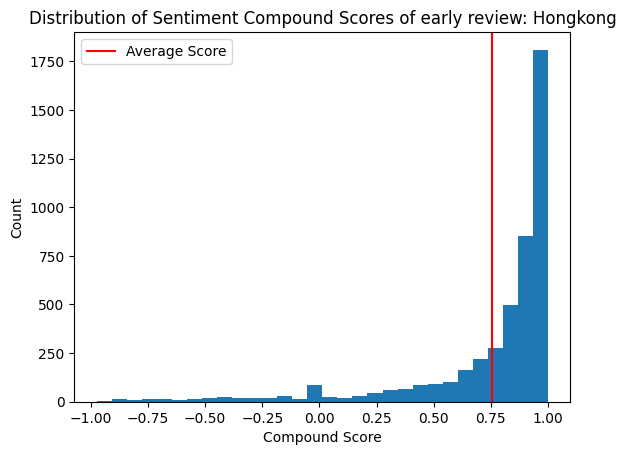

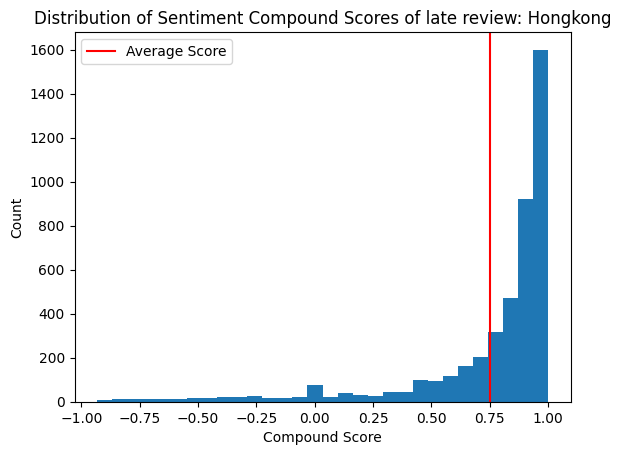

In [93]:
#make a distribution plot

#early
plt.hist(compound_scores_hk_early, bins=30)
plt.axvline(x=average_score_hk_early, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of early review: Hongkong")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

#late
plt.hist(compound_scores_hk_late, bins=30)
plt.axvline(x=average_score_hk_late, color='r', label='Average Score')
plt.title("Distribution of Sentiment Compound Scores of late review: Hongkong")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


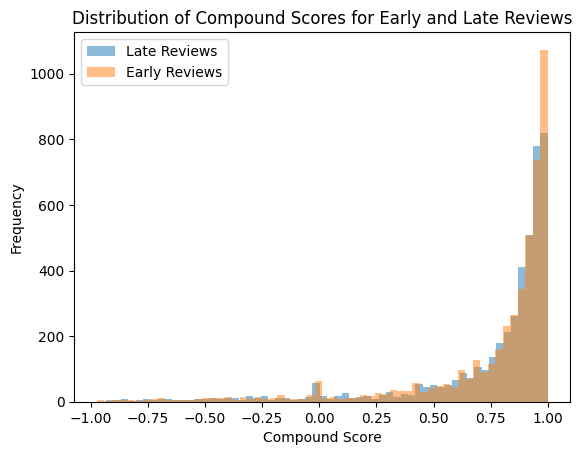

In [94]:
#put them together to compare

plt.hist(compound_scores_hk_late, bins=60, alpha=0.5, label='Late Reviews')

# Create a histogram plot for the compound scores of late reviews
plt.hist(compound_scores_hk_early, bins=60, alpha=0.5, label='Early Reviews')

# Add labels and legend
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores for Early and Late Reviews')
plt.legend()

# Show the plot
plt.show()

###<font color = black> Overall, we can find that based on the topic modeling and sentiment analysis performed on the reviews of Disneyland California, Disneyland Paris, and Hong Kong Disneyland, we can identify some differences among these three branches of Disneyland.<br>For example, the topics discussed in reviews for Disneyland California tended to focus on the different rides and attractions at the park, with a mix of positive and negative sentiments. The reviews for Disneyland Paris also had a focus on specific rides and attractions, but also included comparisons to other Disney parks and criticisms of the behavior of other tourists. The reviews for Hong Kong Disneyland had a similar focus on specific rides and attractions, but also included practical aspects of visiting the park, comparisons to other Disney parks, and criticisms of the behavior of mainland Chinese tourists.<br>Additionally, the sentiment analysis showed that reviews for Disneyland California tended to be more positive overall, while reviews for Hong Kong Disneyland had a more negative sentiment overall.<br>Overall, while there are similarities in the topics discussed across the three branches of Disneyland, there are also some differences in the specific focus and sentiment of the reviews.